In [9]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [0]:
train_data_dir = '/gdrive/My Drive/dataset/train'
validation_data_dir = '/gdrive/My Drive/dataset/val'

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization, Input, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
 train_data_dir,
 target_size=(200, 200),
 batch_size=32,
 class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
 validation_data_dir,
 target_size=(200, 200),
 batch_size=32,
 class_mode='categorical')


Found 13125 images belonging to 8 classes.
Found 558 images belonging to 8 classes.


In [43]:
nb_classes = 8
#, kernel_regularizer=regularizers.l1_l2(0.01), bias_regularizer=regularizers.l1(0.01)

# Initialising the CNN
model = Sequential()

# 1
# model.add(Conv2D(16,(3,3), padding='same', input_shape=(200,200,3), strides=(1, 1))) 
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Conv2D(16, kernel_size=(3,3), activation='relu', strides=(1, 1), padding='valid'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# 2
model.add(Conv2D(32,(3,3), padding='same', input_shape=(200,200,3), strides=(1, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=(2,2), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3
model.add(Conv2D(64,(3,3), padding='same', strides=(1, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(2,2), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4
model.add(Conv2D(128,(3,3), padding='same', strides=(1, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size=(2,2), activation='relu', strides=(1, 1), padding='valid'))
model.add(Dropout(0.25))

# 5
model.add(Conv2D(128,(3,3), padding='same', strides=(1, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size=(2,2), activation='relu', strides=(1, 1), padding='valid'))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='sigmoid'))

# opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_92 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
batch_normalization_64 (Batc (None, 200, 200, 32)      128       
_________________________________________________________________
activation_68 (Activation)   (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 199, 199, 32)      4128      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 99, 99, 64)      

In [0]:
total_train = 13125
total_val = 558
epochs = 12
batch_size = 500
esc = EarlyStopping(monitor='val_acc', patience=2)

from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("/gdrive/My Drive/best_model.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', save_freq=1)

In [45]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_val // batch_size,
    #callbacks=[checkpoint, esc]
)


Epoch 1/12
26/26 [==============================] - 205s 8s/step - loss: 0.6543 - accuracy: 0.2163 - val_loss: 0.4815 - val_accuracy: 0.4375
Epoch 2/12
26/26 [==============================] - 205s 8s/step - loss: 0.3967 - accuracy: 0.4038 - val_loss: 0.3123 - val_accuracy: 0.3125
Epoch 3/12
26/26 [==============================] - 206s 8s/step - loss: 0.3076 - accuracy: 0.5108 - val_loss: 0.2519 - val_accuracy: 0.4062
Epoch 4/12
26/26 [==============================] - 206s 8s/step - loss: 0.2670 - accuracy: 0.5337 - val_loss: 0.3126 - val_accuracy: 0.4062
Epoch 5/12
26/26 [==============================] - 206s 8s/step - loss: 0.2406 - accuracy: 0.5986 - val_loss: 0.2576 - val_accuracy: 0.5625
Epoch 6/12
26/26 [==============================] - 204s 8s/step - loss: 0.2264 - accuracy: 0.6238 - val_loss: 0.2665 - val_accuracy: 0.5000
Epoch 7/12
26/26 [==============================] - 205s 8s/step - loss: 0.2080 - accuracy: 0.6791 - val_loss: 0.3313 - val_accuracy: 0.4062
Epoch 8/12
26

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(12)

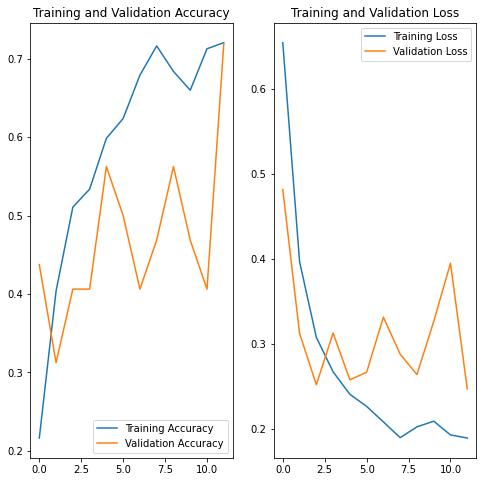

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
save_dir = "/gdrive/My Drive"
json_file = open(save_dir+"/NERO_EmoticonClassification.json", "w")
model_json = model.to_json()
json_file.write(model_json)
json_file.close()
model.save_weights(save_dir+"/NERO_EmoticonClassification_weights.h5")